# 即将上映电影的评分预测  Movie For You

In [3]:
__version__ = "v18.1.9.0641"
__author__ = 'Hansoluo'
__license__ = 'MIT@2018-01'

In [6]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import re

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.model_selection import train_test_split
import tensorflow as tf

## 工作流程
- 问题定义
- 获取&分析数据集
- 数据清洗&预处理
- 数据分析&探索
- 构建模型&训练参数
- 验证&预测结果

## 问题定义
- 需求：刚上映了一部电影，但是要不要去看呢？有人说好看，有人说难看，该如何选择？
- 功能设想：上映电影预测
    - 利用爬取的豆瓣电影数据，构建基于导演、编剧、演员特征的预测模型
    - 查询功能：用户输入即将上映电影的豆瓣页面链接，返回电影信息
    - 预测功能：调用模型，预测电影的评分，给出推荐建议

##  获取&分析数据集
- 有哪些特征？哪些是有用的？
- 哪些特征是类别型？
- 哪些特征是数据型？
- 哪些特征是混合类型?
- 哪些特征是脏数据（格式错误等）？
- 哪些特征数据存在缺失？

In [61]:
# 获取数据
df = pd.read_csv('movie.csv', sep = '^')
# 有哪些特征？哪些是有用的？
df.columns

Index(['id', 'title', 'url', 'cover', 'rate', 'director', 'composer', 'actor',
       'category', 'district', 'language', 'showtime', 'length', 'othername',
       'description'],
      dtype='object')

In [62]:
# 选择有用的特征
df = df[['id','title', 'rate','director', 'actor', 'category', 'district','showtime', 'length']]
# 查看数据集的前5条数据
df.head()

,id,title,rate,director,actor,category,district,showtime,length
0,25746375,我是路人甲,7.4,尔冬升,万国鹏/王婷/沈凯/徐小琴/林晨/魏星/蒿怡帆/蒿怡菲/覃培军/王昭/张文斌/林俭/耿立树/...,剧情/喜剧,China_中国大陆,2015.0,134.0
1,5446197,铁拳,7.1,安东尼·福奎阿,杰克·吉伦哈尔/福里斯特·惠特克/瑞秋·麦克亚当斯/娜奥米·哈里斯/50分/乌娜·劳伦斯/米...,剧情/动作/运动,United States of America_美国/China_中国大陆,2015.0,123.0
2,25885212,我们梦中见,7.6,布雷特·海利,布莱思·丹纳/马丁·斯塔尔/琼·斯奎布/雷亚·普尔曼/玛丽·凯·普莱斯/玛琳·阿克曼/山姆·...,剧情/喜剧,United States of America_美国,2015.0,92.0
3,25728581,少年透明人,6.6,加布里埃尔·萨瓦特瑞斯,卢多维科·吉拉尔德罗/Ludovico Girardello/瓦莱莉·高利诺,奇幻/冒险,Italy_意大利,2014.0,100.0
4,5156558,撒迦利亚,6.0,克雷格·卓贝,玛格特·罗比/克里斯·派恩/切瓦特·埃加福特,剧情/科幻/惊悚,United States of America_美国/Iceland_冰岛,2015.0,95.0


In [64]:
# 查看数据集的特征、数目和类型
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4587 entries, 0 to 4586
Data columns (total 9 columns):
id          4587 non-null int64
title       4587 non-null object
rate        4587 non-null float64
director    4583 non-null object
actor       4576 non-null object
category    4563 non-null object
district    4587 non-null object
showtime    4562 non-null float64
length      4500 non-null float64
dtypes: float64(3), int64(1), object(5)
memory usage: 322.6+ KB


In [65]:
# 查看数据集的特征数据的缺失情况
df.isnull().sum() 

id           0
title        0
rate         0
director     4
actor       11
category    24
district     0
showtime    25
length      87
dtype: int64

In [66]:
# 查看数据集数字类型特征的统计分布情况
df.describe() 

,id,rate,showtime,length
count,4.587000e+03,4587.000000,4562.000000,4500.000000
mean,6.151811e+06,7.207739,2002.145550,109.491556
std,8.124634e+06,1.066365,15.486592,21.794014
min,1.291543e+06,2.500000,1920.000000,22.000000
25%,1.305136e+06,6.500000,1999.000000,95.000000
50%,2.032459e+06,7.300000,2007.000000,106.000000
75%,5.967825e+06,8.100000,2012.000000,119.000000
max,2.659007e+07,9.600000,2015.000000,450.000000


In [67]:
# 查看数据集字符类型特征的统计分布情况
df.describe(include=['O']) 

,title,director,actor,category,district
count,4587,4583,4576,4563,4587
unique,4504,2596,4560,838,488
top,怪物,王晶,韩朔/刘冠成/李美慧/张哲浩,剧情,United States of America_美国
freq,3,19,6,447,1297


## 数据清洗&预处理
- Completing
- Correlating
- Correcting
- Creating
- Classifying

### Completing 缺失数据处理

In [68]:
df = df.dropna() # 去除缺失的行数

### Correlating&charting 特征相关性分析
- 直觉上电影片长和上映时间对电影的好坏影响不大
- 做出趋势图验证相关性
- 趋势一致，去除特征

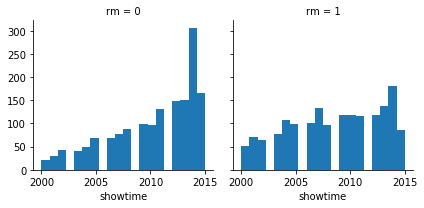

In [69]:
# 筛选数据，选择上映时间在2000年以上，电影时间大于1h的
df = df[(df['showtime'] >= 2000) & (df['length'] >= 60)]
# 电影的评分转换为标准字段 1（7.0以上评分推荐） 和 0（7.0以下不推荐） 
df['rm'] = df['rate'].apply(lambda s :1 if s >= 7 else 0)
# 做出上映时间的趋势图
g = sns.FacetGrid(df, col='rm')
g.map(plt.hist, 'showtime', bins=20)

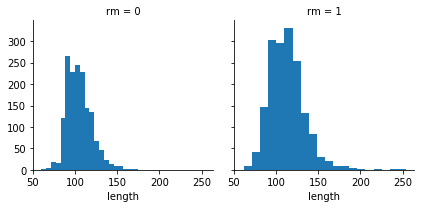

In [70]:
# 做出电影片长的趋势图
g = sns.FacetGrid(df, col='rm')
g.map(plt.hist, 'length', bins=20)

In [71]:
# 去除特征
df = df[['id','title', 'rate','director', 'actor', 'category', 'district']]

### Correcting 纠正特征内容
- 地区特征存在多个地区，选择第一个地区作为特征值
- 导演特征存在多个导演，选择第一个
- 演员特征存在多个演员，拆分成2个特征，演员0 和演员1
- 类型存在多个类型，拆分成3个特征，类型0、类型1、类型2

In [72]:
def get_district(district):
    dis0 = district.split("/")[0]
    dis1 = re.findall(r"[\u4e00-\u9fa5\\]+", dis0)
    if not dis1:
        dis1 = "UNK"
    return dis1[0]
    
# a = "United States of America_美国"   
# get_district(a)
# '美国' 'UNK'

In [73]:
df['district'] = df['district'].apply(lambda s: get_district(s))
df['director'] = df['director'].apply(lambda s: s.split("/")[0])
# 演员拆分成2个特征，演员0 和演员1
df['actor0'] = df['actor'].apply(lambda s: s.split("/")[0])
df['actor1'] = df['actor'].apply(lambda s: s.split("/")[1] if len(s.split("/"))> 1 else "UNK")
# 电影类型拆分成2个特征，类型0、类型1、类型2
df['genre0'] = df['category'].apply(lambda s: s.split("/")[0])
df['genre1'] = df['category'].apply(lambda s: s.split("/")[1] if len(s.split("/"))> 1 else "UNK")
df['genre2'] = df['category'].apply(lambda s: s.split("/")[2] if len(s.split("/"))> 2 else "UNK")

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

### Creating 创建新特征

In [74]:
# 电影的评分转换为标准字段 1（7.0以上评分推荐） 和 0（7.0以下不推荐） 
df['rm'] = df['rate'].apply(lambda s :1 if s >= 7 else 0)
df['nrm'] = df['rm'].apply(lambda s: int(not s))

### Classifying 特征归类
- 无
- 起初认为数据稀疏，将导演手动归为4类，后来经童老师提醒，这样反而不那么智能了

### 导出为标准数据集，完成数据清洗

In [75]:
df = df[['title','director','actor0','actor1','genre0','genre1','district','rate','rm']]
df.to_csv('movie_clean_20180109.csv', encoding='utf-8')

## 数据分析&探索
- Correlating
- Converting
- Charting

### Correlating 相关性
- 电影类型的电影数量不一致，无法进行相关性分析
- 电影上映地区的电影数量不一致，无法分析

In [28]:
df_data = pd.read_csv('movie_clean_20180109.csv')
df_director = df_data[['director', 'rate']].groupby(['director'], as_index=False).mean()
# df_director[df_director['rate']==6.9] # 615 吴京 作为导演水平的均值 填充导演列表缺失的数据
df_actor0 = df_data[['actor0', 'rate']].groupby(['actor0'], as_index=False).mean()
# df_actor0[df_actor0['rate']==6.9] # 766 徐若瑄	 作为演员0 水平的均值 填充缺失的数据
df_actor1 = df_data[['actor1', 'rate']].groupby(['actor1'], as_index=False).mean()
#df_actor1[df_actor1['rate']==6.9] # 1258 梁咏琪	作为演员1 水平的均值 填充缺失的数据

In [56]:
# 电影类型与评分高低的关系
df_data[['genre0', 'rate']].groupby(['genre0'], as_index=False).mean().sort_values(by='rate', ascending=False)[0:20].T

,0,20,8,4,19,2,13,5,1,7,6,3,16,10,17,18,15,12,9,14
genre0,传记,音乐,家庭,动画,运动,剧情,战争,历史,冒险,奇幻,喜剧,动作,犯罪,悬疑,科幻,西部,爱情,惊悚,恐怖,歌舞
rate,8.66667,7.6,7.54,7.52667,7.4,7.26875,7.23333,7.05,7,6.9125,6.76825,6.70215,6.7,6.5507,6.51379,6.5,6.48889,5.98731,5.94231,5.9


In [57]:
# 电影类型的数量
df_data[['genre0', 'rate']].groupby(['genre0'], as_index=False).count().sort_values(by='rate', ascending=False)[0:20].T
# 数量不一致，评分对比没有意义

,2,6,3,10,12,15,9,17,4,7,8,5,19,0,13,1,20,11,14,16
genre0,剧情,喜剧,动作,悬疑,惊悚,爱情,恐怖,科幻,动画,奇幻,家庭,历史,运动,传记,战争,冒险,音乐,情色,歌舞,犯罪
rate,1632,652,418,142,134,90,78,58,15,8,5,4,3,3,3,3,3,2,1,1


In [76]:
df_data[["district", "rate"]].groupby(['district'], as_index=False).count().sort_values(by='rate', ascending=False)[0:9].T

,40,46,27,2,47,42,31,33,14
district,美国,韩国,日本,中国大陆,香港,英国,法国,泰国,台湾
rate,1168,462,423,355,188,172,112,44,38


### Converting 特征向量化
- 导演特征转数字
- 演员特征转数字
- 类型特征转数字
- 地区特征转数字

In [53]:
df_data = pd.read_csv('movie_clean_20180109.csv')
# 特征 导演 文本转数字
director_list = df_data['director'].drop_duplicates().tolist()
director_dic = {c: i for i, c in enumerate(director_list)}
df_data = df_data.replace({'director': director_dic})
# 特征  演员0  文本转数字
actor0_list = df_data['actor0'].drop_duplicates().tolist()
actor0_dic = {c: i for i, c in enumerate(actor0_list)}
df_data = df_data.replace({'actor0': actor0_dic})
# 特征 演员1  文本转数字
actor1_list = df_data['actor1'].drop_duplicates().tolist()
actor1_dic = {c: i for i, c in enumerate(actor1_list)}
df_data = df_data.replace({'actor1': actor1_dic})
# 特征  类型0  文本转数字
genre0_list = df_data['genre0'].drop_duplicates().tolist()
genre0_dic = {c: i for i, c in enumerate(genre0_list)}
df_data = df_data.replace({'genre0': genre0_dic})
# 特征 演员1  文本转数字
genre1_list = df_data['genre1'].drop_duplicates().tolist()
genre1_dic = {c: i for i, c in enumerate(genre1_list)}
df_data = df_data.replace({'genre1': genre1_dic})
# 特征  地区  文本转数字
district_list = df_data['district'].drop_duplicates().tolist()
district_dic = {c: i for i, c in enumerate(district_list)}
df_data = df_data.replace({'district': district_dic})

In [54]:
df_data['nrm'] = df_data['rm'].apply(lambda s: int(not s))
df_data.describe()

,Unnamed: 0,director,actor0,actor1,genre0,genre1,district,rate,rm,nrm
count,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000
mean,2268.565418,878.689803,683.010442,914.710995,2.656634,7.429054,4.537469,6.944625,0.515049,0.484951
std,1347.085581,558.509360,476.594549,588.626728,3.075502,5.534631,6.783132,1.033177,0.499850,0.499850
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000,0.000000,0.000000
25%,979.750000,425.000000,256.000000,424.750000,0.000000,3.000000,1.000000,6.300000,0.000000,0.000000
50%,2337.500000,849.500000,606.000000,874.000000,0.000000,5.000000,3.000000,7.000000,1.000000,0.000000
75%,3371.250000,1336.250000,1060.000000,1398.250000,5.000000,12.000000,6.000000,7.700000,1.000000,1.000000
max,4584.000000,1985.000000,1710.000000,2092.000000,20.000000,25.000000,48.000000,9.300000,1.000000,1.000000


## 构建模型&训练参数
- 拆分数据集
- 构建TensorFlow计算图
- 训练参数

### 拆分数据集

In [55]:
# 标签字段
dataset_Y  = df_data[['rm', 'nrm']]
dataset_Y = dataset_Y.as_matrix()
# dataset_Y

# 特征字段
dataset_X = df_data[['director', 'actor0', 'actor1', 'genre0', 'genre1', 'district']]
dataset_X = dataset_X.as_matrix()

In [56]:
# 使用sklearn的train_test_split函数将标记数据切分为“训练数据集”和“验证数据集”
# 将全部标记数据随机洗牌后切分，其中验证数据占20%，由 test_size数据指定
X_train, X_test, y_train, y_test = train_test_split(dataset_X, dataset_Y, test_size=0.2, random_state=42)
print("训练数据特征值的维度为{}".format(X_train.shape))
print("训练数据标签值的维度为{}".format(y_train.shape))
print("验证数据特征值的维度为{}".format(X_test.shape))
print("验证数据特征值的维度为{}".format(y_test.shape))

训练数据特征值的维度为(2604, 6)
训练数据标签值的维度为(2604, 2)
验证数据特征值的维度为(652, 6)
验证数据特征值的维度为(652, 2)


### 构建计算图 

In [57]:
# 特征数据x由6个字段组成，标记值y由2个字段组成
x = tf.placeholder(tf.float32, shape=[None, 6])
y = tf.placeholder(tf.float32)

In [58]:
# 声明需要训练的变量
w = tf.Variable(tf.random_normal([6, 2]), name='weights')
b = tf.Variable(tf.zeros([2]), name='bias')
# 存储模型参数
saver = tf.train.Saver()

In [59]:
# 构造前向传播计算图
y_pred = tf.nn.softmax(tf.matmul(x, w) + b)
# 构造代价函数
cross_entropy = -tf.reduce_sum(y * tf.log(y_pred + 1e-10), reduction_indices=1)
cost = tf.reduce_mean(cross_entropy)
# 梯度下降算法
train_op = tf.train.AdagradOptimizer(0.03).minimize(cost)

### 训练参数

In [60]:
training_steps = 2000
costs = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(10):
        total_loss = 0
        for i in range(training_steps):
            feed = {x: X_train, y: y_train}
            _, loss = sess.run([train_op, cost], feed_dict=feed)
            total_loss += loss
            costs.append(loss)
        
        print('Epoch: %04d, total loss=%.9f' % (epoch + 1, total_loss))
    
    W = sess.run(w)
    B = sess.run(b)
    print("w={}\nb={}".format(W, B))
    print('Training complete.')
    

    # 评估校验数据集上的准确率
    pred = sess.run(y_pred, feed_dict={x:X_test})
    
    # 存储变量数据
    saver.save(sess, "model_movie.ckpt")

Epoch: 0001, total loss=21097.898578644
Epoch: 0002, total loss=18609.576601028
Epoch: 0003, total loss=18545.154001236
Epoch: 0004, total loss=18491.808577538
Epoch: 0005, total loss=17332.479163647
Epoch: 0006, total loss=8116.447597265
Epoch: 0007, total loss=1820.162974477
Epoch: 0008, total loss=1513.573924720
Epoch: 0009, total loss=1424.404783785
Epoch: 0010, total loss=1381.946475983
w=[[-0.3322717  -0.331467  ]
 [ 0.47127104  0.47173035]
 [-0.59703219 -0.59665263]
 [-0.02604439  0.18157177]
 [ 0.60968137  0.63863182]
 [ 1.32686865  1.30225134]]
b=[ 0.90719604 -0.90719533]
Training complete.


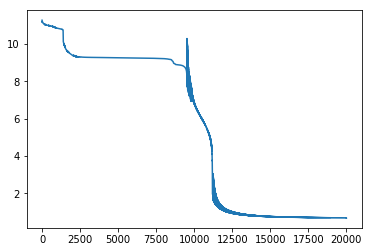

In [61]:
plt.plot(costs)

## 验证&预测结果

### 验证数据集上的预测正确率

In [62]:
print(type(pred))
print(pred.shape)
print(type(y_test))
print(y_test.shape)

<class 'numpy.ndarray'>
(652, 2)
<class 'numpy.ndarray'>
(652, 2)


In [63]:
correct = np.equal(np.argmax(pred, 1), np.argmax(y_test, 1))
accuracy = np.mean(correct.astype(np.float32))
print("Accuracy on validation set: %.9f" % (accuracy)) # 验证数据集上的预测正确率

Accuracy on validation set: 0.628834367


### 预测电影结果

In [47]:
# 读入测试数据并进行预处理
testdata = pd.read_csv('movie_test.csv')
testdata.tail()

,title,director,actor0,actor1,genre0,genre1,district1,rate
15,唐人街探案2,陈思诚,王宝强,刘昊然,喜剧,动作,中国大陆,NaN
16,捉妖记2,许诚毅,梁朝伟,白百何,喜剧,奇幻,中国大陆,NaN
17,西游记女儿国,郑保瑞,郭富城,冯绍峰,喜剧,爱情,中国大陆,NaN
18,狄仁杰之四大天王,徐克,赵又廷,冯绍峰,动作,悬疑,中国大陆,NaN
19,祖宗十九代,郭德纲,岳云鹏,吴京,喜剧,奇幻,中国大陆,NaN


In [48]:
# 615 吴京 作为导演水平的均值 填充导演列表缺失的数据
testdata['director'] = testdata['director'].apply(lambda s: director_dic.get(s))
testdata['director'] = testdata['director'].fillna(615)
# 766 徐若瑄 作为演员0 水平的均值 填充缺失的数据
testdata['actor0'] = testdata['actor0'].apply(lambda s: actor0_dic.get(s))
testdata['actor0'] = testdata['actor0'].fillna(766)
# 1258 梁咏琪 作为演员1 水平的均值 填充缺失的数据
testdata['actor1'] = testdata['actor1'].apply(lambda s: actor1_dic.get(s))
testdata['actor1'] = testdata['actor1'].fillna(1258)

testdata['genre0'] = testdata['genre0'].apply(lambda s: genre0_dic.get(s))
testdata['genre1'] = testdata['genre1'].apply(lambda s: genre1_dic.get(s))
testdata['district1'] = testdata['district1'].apply(lambda s: district_dic.get(s))

In [66]:
movie_test = testdata[['director', 'actor0', 'actor1', 'genre0', 'genre1', 'district1']]

In [67]:
with tf.Session() as sess:
    saver.restore(sess, 'model_movie.ckpt')
    predictions = np.argmax(sess.run(y_pred, feed_dict={x:movie_test}), 1)

INFO:tensorflow:Restoring parameters from model_movie.ckpt


In [72]:
testdata0 = pd.read_csv('movie_test.csv')
movie_pred = pd.DataFrame({
    "title": testdata0['title'],
    "rm": predictions
})
testdata0['rm'] = movie_pred['rm']
testdata0['rm'] = testdata0['rm'].apply(lambda s:"推荐" if s == 1 else "不推荐")
testdata0

,title,director,actor0,actor1,genre0,genre1,district1,rate,rm
0,妖猫传,陈凯歌,黄轩,染谷将太,剧情,悬疑,中国大陆,7.0,不推荐
1,星球大战8：最后的绝地武士,莱恩·约翰逊,马克·哈米尔,凯丽·费雪,动作,科幻,美国,7.4,推荐
2,追龙,王晶,甄子丹,刘德华,动作,犯罪,中国大陆,7.3,推荐
3,芳华,冯小刚,黄轩,苗苗,剧情,历史,中国大陆,7.8,推荐
4,第一夫人 Jackie,帕布罗·拉雷恩,娜塔莉·波特曼,彼得·萨斯加德,剧情,传记,美国,6.6,推荐
5,悟空传,郭子健,彭于晏,倪妮,剧情,动作,中国大陆,5.1,不推荐
6,合约男女,刘国楠,郑秀文,张孝全,喜剧,爱情,中国大陆,4.4,推荐
7,妖铃铃,吴君如,吴君如,沈腾,喜剧,恐怖,中国大陆,4.8,推荐
8,心理罪之城市之光,徐纪周,邓超,阮经天,动作,悬疑,中国大陆,6.1,推荐
9,解忧杂货店,韩杰,王俊凯,迪丽热巴,剧情,奇幻,中国大陆,5.3,不推荐


In [73]:
# 保存为新的数据集
testdata0.to_csv("movie2018_pred", encoding="utf-8")